In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# create a model class that inherits nn.Module

class Model(nn.Module):
    def __init__(self, input_features = 4, h1=8, h2=10, output_features = 3):
        super().__init__()
        self.fc1 = nn.Linear(in_features=input_features, out_features=h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,output_features)

    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.out(x))
        return x
    

In [5]:
torch.manual_seed(43)
model = Model()

In [14]:
url = 'iris.csv'
df = pd.read_csv(url)

In [15]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
df["species"] = le.fit_transform(df["species"])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
X,y = df.drop("species", axis=1), df["species"]

In [19]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=43)

In [31]:
X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

In [32]:
criteria = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.02)


In [33]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=3, bias=True)
)>

In [35]:
epoch = 256
losses = []
for i in range(epoch):
    y_pred = model.forward(X_train)
    loss = criteria(y_pred, y_train)
    losses.append(loss.detach().numpy())

    if i%10==1:
        print(f"epoch: {i}, loss: {loss}")

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

/tmp/ipykernel_19029/707627982.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.out(x))


epoch: 1, loss: 1.0953218936920166
epoch: 11, loss: 0.9600034952163696
epoch: 21, loss: 0.772222101688385
epoch: 31, loss: 0.6273145079612732
epoch: 41, loss: 0.5868949294090271
epoch: 51, loss: 0.5802543759346008
epoch: 61, loss: 0.5775979161262512
epoch: 71, loss: 0.5759560465812683
epoch: 81, loss: 0.5748124718666077
epoch: 91, loss: 0.5739294290542603
epoch: 101, loss: 0.5732124447822571
epoch: 111, loss: 0.5725938081741333
epoch: 121, loss: 0.5729883909225464
epoch: 131, loss: 0.5716215372085571
epoch: 141, loss: 0.5714951753616333
epoch: 151, loss: 0.5708830952644348
epoch: 161, loss: 0.5706748366355896
epoch: 171, loss: 0.5709031224250793
epoch: 181, loss: 0.5714406371116638
epoch: 191, loss: 0.569912314414978
epoch: 201, loss: 0.5694915056228638
epoch: 211, loss: 0.5699105858802795
epoch: 221, loss: 0.5700846314430237
epoch: 231, loss: 0.569575846195221
epoch: 241, loss: 0.5688217282295227
epoch: 251, loss: 0.5685989856719971


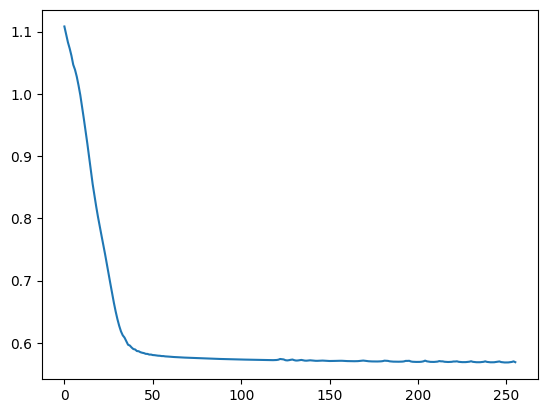

In [36]:
plt.plot(range(epoch), losses)

In [37]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criteria(y_eval, y_test)
    

/tmp/ipykernel_19029/707627982.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.out(x))


In [40]:
y_pred = y_eval.argmax(axis=1)
y_pred

tensor([0, 0, 2, 1, 2, 0, 2, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 2, 2, 0, 0, 0, 2,
        2, 2, 0, 1, 0, 0])

Accuracy: 100.0%


<Axes: >

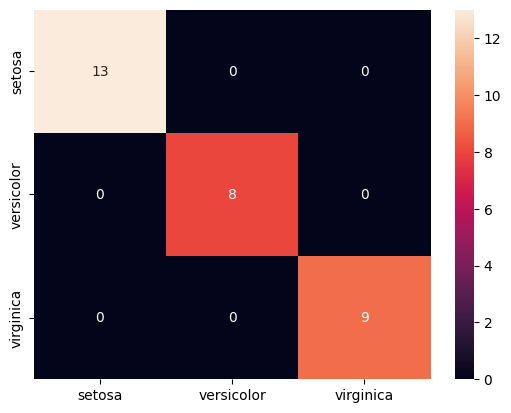

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
cm = confusion_matrix(y_test, y_pred)
accuracy = (y_pred == y_test).sum().item() / len(y_test) * 100
print(f"Accuracy: {accuracy}%")
class_names = le.classes_
sn.heatmap(cm, annot=True, xticklabels=le.classes_, yticklabels=le.classes_)

In [50]:
x = (y_pred == y_test).sum()
dir(x)

['H',
 'T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__idiv__',
 '__ifloordiv__',
 '__ilshift__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__repr_